In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

setName = "Linear"
write_fig = True
if write_fig:
    print("Write figure: " + "\033[1;32mTrue\033[0m")
else:
    print("Write figure: " + "\033[1;31mFalse\033[0m")

Write figure: True


In [3]:
result_df_list = []
for mobile_mode in ["Fix", "Mob"]:
    for k in range(0, 11):
        for k2 in range(1, 21):
            part_df = pd.read_csv(f"./{mobile_mode}_Set1+_{setName}_{k}_{k2}.csv")
            part_df["k"] = [k for i in range(len(part_df))]
            part_df["k2"] = [k2 for i in range(len(part_df))]
            part_df["mobile_mode"] = [mobile_mode for i in range(len(part_df))]
            result_df_list.append(part_df)

result_df_all = pd.concat(result_df_list)
result_df_all

# result_df_all = result_df_all["FI_spac", "FI_temp", "k", "mobile_mode", "worst_case", "nominal_case"].groupby(["FI_spac", "FI_temp", "k", "mobile_mode"]).agg({"worst_case": "mean", "nominal_case": "mean"})

,FI_spac,FI_temp,worst_case,nominal_case,large_modules,small_modules,worst_decision,k,k2,mobile_mode,worst_demand
0,0.0,0.0,4660.708158,4542.660879,1.0,1.0,"Y[i = 1, l = 4, t = 1]: 1.00; Y[i = 1, l = 4, ...",0,1,Fix,NaN
1,0.0,0.1,4660.708158,4542.660879,1.0,1.0,"Y[i = 1, l = 4, t = 1]: 1.00; Y[i = 1, l = 4, ...",0,1,Fix,NaN
2,0.0,0.2,4660.708158,4542.660879,1.0,1.0,"Y[i = 1, l = 4, t = 1]: 1.00; Y[i = 1, l = 4, ...",0,1,Fix,NaN
3,0.0,0.3,4660.708158,4542.660879,1.0,1.0,"Y[i = 1, l = 4, t = 1]: 1.00; Y[i = 1, l = 4, ...",0,1,Fix,NaN
4,0.0,0.4,4660.708158,4542.660879,1.0,1.0,"Y[i = 1, l = 4, t = 1]: 1.00; Y[i = 1, l = 4, ...",0,1,Fix,NaN
...,...,...,...,...,...,...,...,...,...,...,...
116,1.0,0.6,5505.986657,5098.885497,1.0,0.0,"Y[i = 1, l = 4, t = 1]: 1.00; Y[i = 1, l = 4, ...",10,20,Mob,"d[j = 1, t = 1]: 5832.78; d[j = 1, t = 2]: 810..."
117,1.0,0.7,5505.986657,5098.885497,1.0,0.0,"Y[i = 1, l = 4, t = 1]: 1.00; Y[i = 1, l = 4, ...",10,20,Mob,"d[j = 1, t = 1]: 5832.78; d[j = 1, t = 2]: 810..."
118,1.0,0.8,5505.986657,5098.885497,1.0,0.0,"Y[i = 1, l = 4, t = 1]: 1.00; Y[i = 1, l = 4, ...",10,20,Mob,"d[j = 1, t = 1]: 5832.78; d[j = 1, t = 2]: 810..."
119,1.0,0.9,5505.986657,5098.885497,1.0,0.0,"Y[i = 1, l = 4, t = 1]: 1.00; Y[i = 1, l = 4, ...",10,20,Mob,"d[j = 1, t = 1]: 5832.78; d[j = 1, t = 2]: 810..."


In [3]:
result_df_fix = result_df_all.query("mobile_mode == 'Fix'").reset_index(drop = True)
result_df_mob = result_df_all.query("mobile_mode == 'Mob'").reset_index(drop = True)

result_df_mob["worst_fix"] = result_df_fix["worst_case"]
result_df_mob["nominal_fix"] = result_df_fix["nominal_case"]
result_df_mob["worst_vmm"] = (result_df_mob["worst_fix"] - result_df_mob["worst_case"]) / result_df_mob["worst_fix"]

In [4]:
large_small_agg = result_df_all.query("(k == 0) & (mobile_mode == 'Mob')")[["FI_spac", "FI_temp", "large_modules", "small_modules", "k2"]].groupby(["FI_spac", "FI_temp"]).agg(large_mean = ("large_modules", "mean"), large_std = ("large_modules", "std"), small_mean = ("small_modules", "mean"), small_std = ("small_modules", "std")).reset_index()

# print(large_small_agg.to_markdown())

# print(result_df_all.query("(k == 10) & (k2 == 8) & (mobile_mode == 'Mob')")[["FI_spac", "FI_temp", "large_modules", "small_modules"]].to_markdown())

In [5]:
result_grouped = result_df_all[["FI_spac", "FI_temp", "k", "mobile_mode", "worst_case", "nominal_case", "large_modules", "small_modules"]].groupby(["FI_spac", "FI_temp", "k", "mobile_mode"]).mean().reset_index()
result_grouped

result_slices = {}
for k in range(0, 11):
    for mobile_mode in ["Fix", "Mob"]:
        result_slices[(k, mobile_mode)] = result_grouped.query("k == @k & mobile_mode == @mobile_mode")

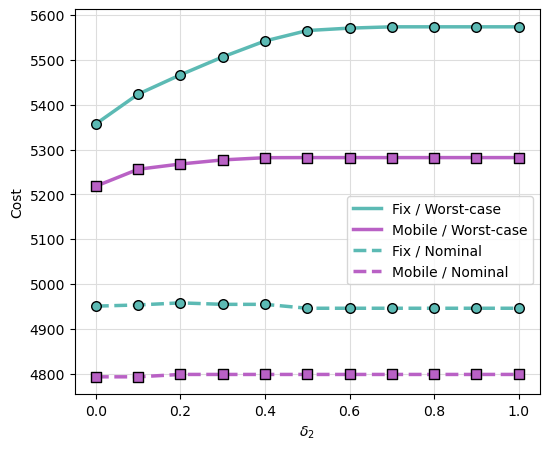

In [27]:
# colors = {0: "#ffbd4f", 2: "#ffbd4f", 4: "#5d77a9", 6: "#af4c10", 8: "#5cbab4", 10: "#b961c5"}
fidx = 1
k = 10
fig_data = pd.DataFrame()

plt.figure(figsize = (6, 5))
# plt.subplot(1, 2, 1)

k_part_df = result_slices[(k, "Fix")].query("FI_spac == 1.0")
plt.plot(k_part_df["FI_temp"], k_part_df["worst_case"], color = "#5cbab4", label = "Fix / Worst-case", lw = 2.5)
plt.scatter(k_part_df["FI_temp"], k_part_df["worst_case"], color = "#5cbab4", s = 48, edgecolor = "black", label = None, zorder = 2)
fig_data["delta_1"] = k_part_df["FI_temp"].reset_index(drop = True)
fig_data["fix_worst"] = k_part_df["worst_case"].reset_index(drop = True)

k_part_df = result_slices[(k, "Mob")].query("FI_spac == 1.0")
plt.plot(k_part_df["FI_temp"], k_part_df["worst_case"], color = "#b961c5", label = "Mobile / Worst-case", lw = 2.5)
plt.scatter(k_part_df["FI_temp"], k_part_df["worst_case"], color = "#b961c5", s = 48, marker = "s", edgecolor = "black", label = None, zorder = 2)
fig_data["mob_worst"] = k_part_df["worst_case"].reset_index(drop = True)
# plt.legend()
# plt.xlabel("$\delta_2$")
# plt.ylabel("Worst cost")
plt.grid(color = "#dddddd")

# plt.subplot(1, 2, 2)
k_part_df = result_slices[(k, "Fix")].query("FI_spac == 1.0")
plt.plot(k_part_df["FI_temp"], k_part_df["nominal_case"], color = "#5cbab4", label = "Fix / Nominal", lw = 2.5, linestyle = "--")
plt.scatter(k_part_df["FI_temp"], k_part_df["nominal_case"], color = "#5cbab4", s = 48, edgecolor = "black", label = None, zorder = 2)
fig_data["fix_nom"] = k_part_df["nominal_case"].reset_index(drop = True)

k_part_df = result_slices[(k, "Mob")].query("FI_spac == 1.0")
plt.plot(k_part_df["FI_temp"], k_part_df["nominal_case"], color = "#b961c5", label = "Mobile / Nominal", lw = 2.5, linestyle = "--")
plt.scatter(k_part_df["FI_temp"], k_part_df["nominal_case"], color = "#b961c5", s = 48, marker = "s", edgecolor = "black", label = None, zorder = 2)
fig_data["mob_nom"] = k_part_df["nominal_case"].reset_index(drop = True)

plt.legend(bbox_to_anchor = (1, 0.4), loc = "center right")
plt.xlabel("$\delta_2$")
plt.ylabel("Cost")
plt.grid(color = "#dddddd")

if write_fig:
    plt.savefig(f"./data/{setName}/Result_with_nominal/figures/illus_FI2_k={k}.png")

In [28]:
print(fig_data.to_csv())

,delta_1,fix_worst,mob_worst,fix_nom,mob_nom
0,0.0,5357.245544820804,5218.403082183628,4950.984964026877,4793.428663791361
1,0.1,5423.559806631857,5256.084481347751,4953.664423325979,4793.428663791361
2,0.2,5466.563788608428,5267.793843839387,4958.262781175267,4798.753516193236
3,0.3,5506.492694051738,5276.9241491041275,4954.978068141595,4798.72362803871
4,0.4,5542.039707209477,5281.873803900033,4954.978068141595,4798.72362803871
5,0.5,5565.279503865881,5282.088443563478,4946.26795934188,4798.72362803871
6,0.6,5570.675818964039,5282.088444033276,4946.26795934188,4798.72362803871
7,0.7,5573.56782390897,5282.088444079924,4946.26795934188,4798.72362803871
8,0.8,5573.567823909032,5282.088444100544,4946.26795934188,4798.72362803871
9,0.9,5573.56782390903,5282.088444166477,4946.26795934188,4798.72362803871
10,1.0,5573.567823908969,5282.088432069095,4946.26795934188,4798.753516193236



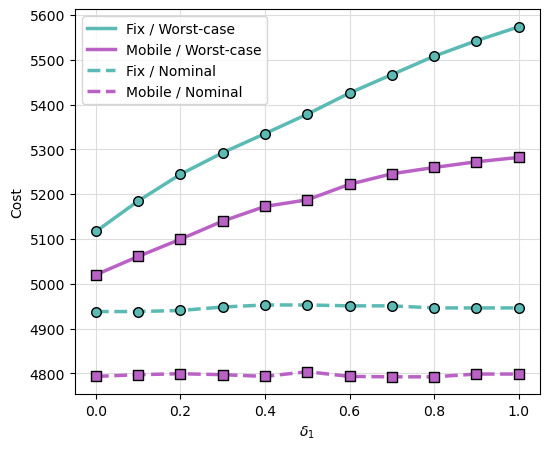

In [25]:
colors = {0: "#ffbd4f", 2: "#ffbd4f", 4: "#5d77a9", 6: "#af4c10", 8: "#5cbab4", 10: "#b961c5"}
fidx = 1
k = 10

fig_data = pd.DataFrame()

plt.figure(figsize = (6, 5))
#plt.subplot(1, 2, 1)

k_part_df = result_slices[(k, "Fix")].query("FI_temp == 1.0")
plt.plot(k_part_df["FI_spac"], k_part_df["worst_case"], color = "#5cbab4", label = "Fix / Worst-case", lw = 2.5)
plt.scatter(k_part_df["FI_spac"], k_part_df["worst_case"], color = "#5cbab4", s = 48, edgecolor = "black", label = None, zorder = 2)
fig_data["delta_1"] = k_part_df["FI_spac"].reset_index(drop = True)
fig_data["fix_worst"] = k_part_df["worst_case"].reset_index(drop = True)

k_part_df = result_slices[(k, "Mob")].query("FI_temp == 1.0")
plt.plot(k_part_df["FI_spac"], k_part_df["worst_case"], color = "#b961c5", label = "Mobile / Worst-case", lw = 2.5)
plt.scatter(k_part_df["FI_spac"], k_part_df["worst_case"], color = "#b961c5", s = 48, marker = "s", edgecolor = "black", label = None, zorder = 2)
fig_data["mob_worst"] = k_part_df["worst_case"].reset_index(drop = True)
# plt.legend()
# plt.title("(a)")
# plt.xlabel("$\delta_1$")
# plt.ylabel("Worst cost")
plt.grid(color = "#dddddd")

#plt.subplot(1, 2, 2)
k_part_df = result_slices[(k, "Fix")].query("FI_temp == 1.0")
plt.plot(k_part_df["FI_spac"], k_part_df["nominal_case"], color = "#5cbab4", label = "Fix / Nominal", lw = 2.5, linestyle = "--")
plt.scatter(k_part_df["FI_spac"], k_part_df["nominal_case"], color = "#5cbab4", s = 48, edgecolor = "black", label = None, zorder = 2)
fig_data["fix_nom"] = k_part_df["nominal_case"].reset_index(drop = True)

k_part_df = result_slices[(k, "Mob")].query("FI_temp == 1.0")
plt.plot(k_part_df["FI_spac"], k_part_df["nominal_case"], color = "#b961c5", label = "Mobile / Nominal", lw = 2.5, linestyle = "--")
plt.scatter(k_part_df["FI_spac"], k_part_df["nominal_case"], color = "#b961c5", s = 48, marker = "s", edgecolor = "black", label = None, zorder = 2)
fig_data["mob_nom"] = k_part_df["nominal_case"].reset_index(drop = True)

plt.legend()
#plt.title("(b)")
plt.xlabel("$\delta_1$")
plt.ylabel("Cost")
plt.grid(color = "#dddddd")

if write_fig:
    plt.savefig(f"./data/{setName}/Result_with_nominal/figures/illus_FI1_k={k}.png")

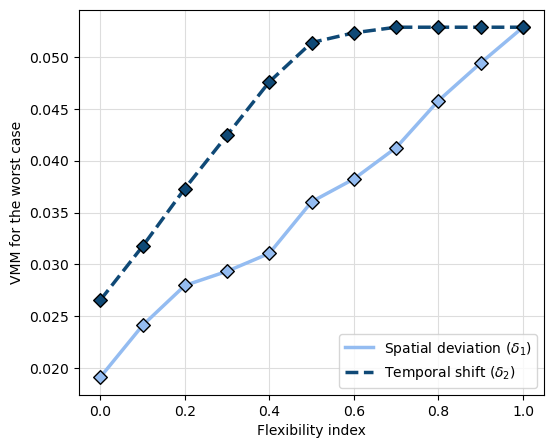

In [23]:
# colors = {0: "#ffbd4f", 2: "#ffbd4f", 4: "#5d77a9", 6: "#af4c10", 8: "#5cbab4", 10: "#b961c5"}
k = 10
result_df_mob_group = result_df_mob.query("k == @k")[["FI_spac", "FI_temp", "k", "worst_vmm"]].groupby(["FI_spac", "FI_temp", "k"]).agg(worst_vmm_mean = ("worst_vmm", "mean"), worst_vmm_std = ("worst_vmm", "std")).reset_index()

fig_data = pd.DataFrame()

plt.figure(figsize = (6, 5))
# plt.subplot(121)
result_df_mob_group_1 = result_df_mob_group.query("FI_temp == 1.0")

plt.plot(result_df_mob_group_1["FI_spac"], result_df_mob_group_1["worst_vmm_mean"], color = "#94bcf1", lw = 2.5, label = "Spatial deviation ($\delta_1$)")
plt.scatter(result_df_mob_group_1["FI_spac"], result_df_mob_group_1["worst_vmm_mean"], color = "#94bcf1", s = 48, edgecolor = "black", zorder = 2, marker = "D")
plt.legend()
# plt.title("(a)")
# plt.xlabel("$\delta_1$")
# plt.ylabel("VMM")
# plt.grid(color = "#dddddd")
# plt.subplot(122)
result_df_mob_group_2 = result_df_mob_group.query("FI_spac == 1.0")

plt.plot(result_df_mob_group_2["FI_temp"], result_df_mob_group_2["worst_vmm_mean"], color = "#0f4976", lw = 2.5, label = "Temporal shift ($\delta_2$)", linestyle = "--")
plt.scatter(result_df_mob_group_2["FI_temp"], result_df_mob_group_2["worst_vmm_mean"], color = "#0f4976", s = 48, edgecolor = "black", zorder = 2, marker = "D")
plt.legend()

fig_data["delta"] = result_df_mob_group_1["FI_spac"].reset_index(drop = True)
fig_data["spac_vmm"] = result_df_mob_group_1["worst_vmm_mean"].reset_index(drop = True)
fig_data["temp_vmm"] = result_df_mob_group_2["worst_vmm_mean"].reset_index(drop = True)
# plt.title("(b)")
plt.xlabel("Flexibility index")
plt.ylabel("VMM for the worst case")
plt.grid(color = "#dddddd")

if write_fig:
    plt.savefig(f"./data/{setName}/Result_with_nominal/figures/illus_worst_VMM_k={k}.png")

In [24]:
print(fig_data.to_csv())

,delta,spac_vmm,temp_vmm
0,0.0,0.019131791031390802,0.026555776244891603
1,0.1,0.02412331672823563,0.03174193165930926
2,0.2,0.02796982635027074,0.0373130356731827
3,0.3,0.029341287294216107,0.04245386455887895
4,0.4,0.03106703115121684,0.04759799708980879
5,0.5,0.036042340454649574,0.051377918483826016
6,0.6,0.038237860623906675,0.0523166964170231
7,0.7,0.04125709585768531,0.052855263096793156
8,0.8,0.045781191920564776,0.05285526309299474
9,0.9,0.04941670679505381,0.05285526307987866
10,1.0,0.05285526542380188,0.05285526542380188



In [38]:
result_df_mob.query("k == 10")[["FI_spac", "FI_temp", "worst_vmm"]].groupby(["FI_spac", "FI_temp"]).agg("mean").reset_index()

,FI_spac,FI_temp,worst_vmm
0,0.0,0.0,0.019059
1,0.0,0.1,0.019150
2,0.0,0.2,0.019150
3,0.0,0.3,0.019150
4,0.0,0.4,0.019026
...,...,...,...
116,1.0,0.6,0.052317
117,1.0,0.7,0.052855
118,1.0,0.8,0.052855
119,1.0,0.9,0.052855


In [154]:
def rebuild_matrix(data_df):
    dimensions = []
    cols = data_df.columns
    for col in cols:
        if col == "value": break
        dimensions.append(data_df[col].max())

    result = np.zeros(dimensions)
    for _, row in data_df.iterrows():
        row_list = row.values.flatten().tolist()
        value = row_list.pop(-1)
        for i in range(len(row_list)):
            row_list[i] = int(row_list[i]) - 1
        result[tuple(row_list)] = value

    return result

FI1 = 1.0
FI2 = 1.0

k = 10
k2 = 8
mobile_mode = "Mob"

iloc_df = pd.read_csv(f"./data/{setName}/{setName}_{k}_{k2}/input_iloc.csv")
iloc_mat = rebuild_matrix(iloc_df)
jloc_df = pd.read_csv(f"./data/{setName}/{setName}_{k}_{k2}/input_jloc.csv")
jloc_mat = rebuild_matrix(jloc_df)
input_d_df = pd.read_csv(f"./data/{setName}/{setName}_{k}_{k2}/input_d.csv")
input_d_mat = rebuild_matrix(input_d_df)
input_c_df = pd.read_csv(f"./data/{setName}/{setName}_{k}_{k2}/input_c.csv")
input_c_mat = rebuild_matrix(input_c_df)
input_g_df = pd.read_csv(f"./data/{setName}/{setName}_{k}_{k2}/input_g.csv")
input_g_mat = rebuild_matrix(input_g_df)

ujmap_df = pd.read_csv(f"./data/{setName}/{setName}_{k}_{k2}/Variable_result/Set1_result_uncertain_j_list_{mobile_mode}_FI1={FI1}_FI2={FI2}.csv")
u_worst_df = pd.read_csv(f"./data/{setName}/{setName}_{k}_{k2}/Variable_result/Set1_result_worst_case_{mobile_mode}_FI1={FI1}_FI2={FI2}.csv")
x_design_df = pd.read_csv(f"./data/{setName}/{setName}_{k}_{k2}/Variable_result/Set1_result_x_design_{mobile_mode}_FI1={FI1}_FI2={FI2}.csv")
y_config_df = pd.read_csv(f"./data/{setName}/{setName}_{k}_{k2}/Variable_result/Set1_result_y_config_{mobile_mode}_FI1={FI1}_FI2={FI2}.csv")
y_flow_df = pd.read_csv(f"./data/{setName}/{setName}_{k}_{k2}/Variable_result/Set1_result_y_flow_{mobile_mode}_FI1={FI1}_FI2={FI2}.csv")

ujmap_mat = rebuild_matrix(ujmap_df) - 1 # Julia indexes start from 1, while Python indexes start from 0
u_worst_mat = rebuild_matrix(u_worst_df)
x_design_mat = rebuild_matrix(x_design_df)
y_config_mat = rebuild_matrix(y_config_df)
y_flow_mat = rebuild_matrix(y_flow_df)

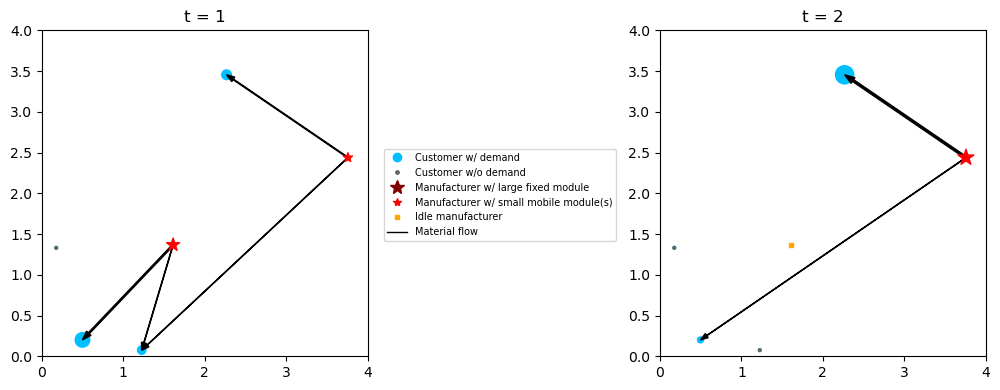

In [155]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

I_SIZE, J_SIZE, L_SIZE, T_SIZE = y_flow_mat.shape
UI = ujmap_mat.shape[0]
j_to_uj_dict = {}

for t in range(T_SIZE):
    j_to_uj_dict[t] = {}
    for uj in range(UI):
        j_to_uj_dict[t][int(ujmap_mat[uj, t])] = uj

fig, ax = plt.subplots(1, 2, figsize = (14, 4))
ax = ax.reshape(2)
# plt.suptitle(f"Worst-case result for illustrative example (uniform base, {'mobile' if mobile_mode == 'Mob' else 'fixed'} case) when $\delta_1$ = {FI1}, $\delta_2$ = {FI2}")
for t in range(T_SIZE):
    ax_t = ax[t]
    ax_t.set(xlim = (0, 4), ylim = (0, 4))
    ax_t.set_aspect("equal")
    ax_t.set_title(f"t = {t + 1}")
    # ax_t.set_xlabel("Longitude")
    # ax_t.set_ylabel("Latitude")
    # ax_t.get_xaxis().set_visible(False)
    # ax_t.get_yaxis().set_visible(False)
    # for spine in ax_t.spines.values():
    #     spine.set_visible(False)

    real_demand = np.zeros(J_SIZE)
    manufacturer_config = np.ones(I_SIZE).astype(np.int64) * 4
    for j in range(J_SIZE):
        if j in ujmap_mat[:, t]:
            real_demand[j] = u_worst_mat[j_to_uj_dict[t][j], t]
        else:
            real_demand[j] = input_d_mat[j, t]
    # print(real_demand)
    ax_t.scatter(jloc_mat[:, 1], jloc_mat[:, 0], c = "deepskyblue", s = (real_demand > 0) * (real_demand / 70) + 4, label = "Customers with demand")
    ax_t.scatter(jloc_mat[:, 1], jloc_mat[:, 0], c = "#666666", s = (real_demand == 0) * 4, label = "Customers without demand")

    config_size = np.array([6, 12, 18, 18, 0]) * 8
    color = ["red", "red", "red", "maroon", "white"]
    
    ax_t.scatter(iloc_mat[:, 1], iloc_mat[:, 0], color = "orange", marker = "s", s = 6)
    for i in range(I_SIZE):
        for l in range(L_SIZE):
            if y_config_mat[i, l, t] > 0.05:
                manufacturer_config[i] = l

    for i in range(I_SIZE):
        for j in range(J_SIZE):
            amount = sum(y_flow_mat[i, j, :, t])
            if amount > 0.01:
                ax_t.arrow(iloc_mat[i, 1], iloc_mat[i, 0], jloc_mat[j, 1] - iloc_mat[i, 1], jloc_mat[j, 0] - iloc_mat[i, 0], 
                          length_includes_head = True, 
                          width = 0.002 + amount / 5e5,
                          head_width = 0.06 + amount / 5e5,
                          linewidth = None,
                          color = "black",
                          alpha = 1.0)
    ax_t.scatter(iloc_mat[:, 1], iloc_mat[:, 0], color = [color[manufacturer_config[i]] for i in range(I_SIZE)], s = [config_size[manufacturer_config[i]] for i in range(I_SIZE)], marker = "*")
    # ax_t.legend()

fig.tight_layout()
legend_elements = [
    Line2D([0], [0], marker = 'o', color = "deepskyblue", markersize = 6, label = "Customer w/ demand", lw = 0),
    Line2D([0], [0], marker = 'o', color = "#666666", markersize = 2.5, label = "Customer w/o demand", lw = 0),
    Line2D([0], [0], marker = '*', color = "maroon", markersize = 10, label = "Manufacturer w/ large fixed module", lw = 0),
    Line2D([0], [0], marker = '*', color = "red", markersize = 6, label = "Manufacturer w/ small mobile module(s)", lw = 0),
    Line2D([0], [0], marker = 's', color = "orange", markersize = 3, label = "Idle manufacturer", lw = 0),
    Line2D([0], [0], color = "k", lw = 1, label = "Material flow")
]

fig.legend(handles = legend_elements, loc = "center", bbox_to_anchor = (0.49, 0.5), fontsize = 7)
plt.savefig(f"./data/Linear/Result_with_nominal/figures/illus_flow_plot_k={k}_k2={k2}_FI1={FI1}_FI2={FI2}_{mobile_mode}.png", bbox_inches = "tight")

In [30]:
vmm_images = {}

for k in range(1, 11):
    k_join_df = result_df_mob.query("k == 10")[["FI_spac", "FI_temp", "worst_vmm"]].groupby(["FI_spac", "FI_temp"]).agg("mean").reset_index()
    
    vmm_images[k] = np.zeros((11, 11))
    for i in range(11):
        for j in range(11):
            pass
            # print(k_join_df.query("(FI_spac == (@i / 10.0)) & (FI_temp == (@j / 10.0))").reset_index(drop = True)["VMM_worst"])
            vmm_images[k][i, j] = k_join_df.query(f"FI_spac == {i / 10.0} & FI_temp == {j / 10.0}").reset_index(drop = True)["worst_vmm"][0]

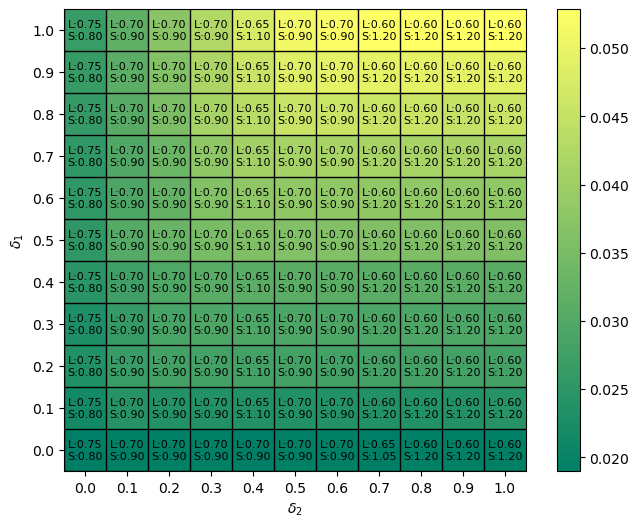

In [ ]:
k = 10
plt.figure(figsize = (8, 6))
ax = plt.gca()

# plt.title(f"VMM for k = {k // 2}")
plt.imshow(vmm_images[k], cmap = "summer")
plt.xticks(ticks = list(range(11)), labels = [str(i / 10.0) for i in range(11)])
plt.yticks(ticks = list(range(11)), labels = [str(i / 10.0) for i in range(11)])
plt.xlabel("$\delta_2$")
plt.ylabel("$\delta_1$")
for i in range(11):
    for j in range(11):
        large_mean = large_small_agg.query(f"(FI_spac == {i / 10}) & (FI_temp == {j / 10})").reset_index(drop = True)["large_mean"][0]
        small_mean = large_small_agg.query(f"(FI_spac == {i / 10}) & (FI_temp == {j / 10})").reset_index(drop = True)["small_mean"][0]
        color = "black" if vmm_images[k][j, i] > np.quantile(vmm_images[k], 0.75) else "white"
        plt.text(i, j, f"L:{large_mean:.2f}\nS:{small_mean:.2f}", va = "center", ha = "center", fontdict = {"fontsize": 8}, color = "k")

ax.invert_yaxis()
plt.colorbar()
for i in range(11):
    plt.axhline(y = i - 0.5, color = "k", linewidth = 1)
    plt.axvline(x = i - 0.5, color = "k", linewidth = 1)
if write_fig:
    plt.savefig(f"./data/{setName}/Result_with_nominal/figures/illus_worst_VMM_heatmap_k={k}.png")

In [41]:
fig_data = pd.DataFrame(columns = ["delta1", "delta2", "VMM%"])

for i in range(11):
    for j in range(11):
        fig_data = pd.concat([fig_data, pd.DataFrame({"delta1": i / 10, "delta2": j / 10, "VMM%": vmm_images[k][i, j] * 100}, index = [0])], ignore_index = True)

/tmp/ipykernel_2426437/1106498738.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fig_data = pd.concat([fig_data, pd.DataFrame({"delta1": i / 10, "delta2": j / 10, "VMM%": vmm_images[k][i, j] * 100}, index = [0])], ignore_index = True)


In [43]:
print(fig_data.to_csv())

,delta1,delta2,VMM%
0,0.0,0.0,1.9059412302236882
1,0.0,0.1,1.9149854002123534
2,0.0,0.2,1.9149853871076057
3,0.0,0.3,1.9149853871076101
4,0.0,0.4,1.9026298661144292
5,0.0,0.5,1.9149854008650768
6,0.0,0.6,1.9149854008650529
7,0.0,0.7,1.8983689477986763
8,0.0,0.8,1.9180883993442108
9,0.0,0.9,1.9180883993442226
10,0.0,1.0,1.9131791031390801
11,0.1,0.0,2.161120901673217
12,0.1,0.1,2.412169498364463
13,0.1,0.2,2.370695289817171
14,0.1,0.3,2.3706952898171694
15,0.1,0.4,2.370695289816127
16,0.1,0.5,2.3706953034804616
17,0.1,0.6,2.370695303480467
18,0.1,0.7,2.370695303480493
19,0.1,0.8,2.370695289816105
20,0.1,0.9,2.3706952898161293
21,0.1,1.0,2.412331672823563
22,0.2,0.0,2.343548508884755
23,0.2,0.1,2.6539647079182243
24,0.2,0.2,2.7968841335432586
25,0.2,0.3,2.7969826347391877
26,0.2,0.4,2.7969826347391895
27,0.2,0.5,2.7969826347382014
28,0.2,0.6,2.796982634570332
29,0.2,0.7,2.7969826347382023
30,0.2,0.8,2.7969826617255267
31,0.2,0.9,2.79698264805959
32,0.2,1.0,2.796982635027074
33,0.3,0.0,2.

In [143]:
large_small_agg.query("(FI_spac == 0 / 10.0) & (FI_temp == 3 / 10.0)")

,FI_spac,FI_temp,large_mean,large_std,small_mean,small_std
3,0.0,0.3,0.75,0.444262,0.8,1.321881
